#**Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

*   Importación y manipulación de datos desde una API.
*   Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
*   Creación de visualizaciones estratégicas para identificar patrones y tendencias.
*   Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.


#📌 Extracción

In [599]:
# Carga de librerias e importación de datos
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

In [600]:
# Normalización de la data
df_normalizado = pd.json_normalize(data)
df_normalizado

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [601]:
# Revisión de valores únicos en las columnas
for col in df_normalizado.columns:
  print(f"Valores únicos en la columna'{col}': {df_normalizado[col].nunique()}")
  if df_normalizado[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_normalizado[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

Valores únicos en la columna'customerID': 7267
Valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
Valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
Valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
Valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna'customer.tenure': 73
Valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
Valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
Valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [602]:
#Revisión de  Nulos
print("Cant. de Nulos", df_normalizado.isnull().sum())

Cant. de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [603]:
#Revisión de Duplicados
print("Cant. de duplicados", df_normalizado.duplicated().sum())

Cant. de duplicados 0


In [604]:
#Revisión de vacios
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [605]:
# Verificación de tipos de datos 'account.Charges.Total'
print(df_normalizado['account.Charges.Total'].dtype)

object


In [606]:
# Verificación de tipos de datos 'Churn'
print(df_normalizado['Churn'].dtype)

object


In [607]:

#Cambiando la columna "account.Charges.Total" a Float

df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


In [608]:
# Eliminando las columnas de Churn

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_normalizado))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [609]:
# Vacíos o en blanco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [610]:
df_normalizado['Cuentas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30
print(df_normalizado[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [611]:
df_normalizado = df_normalizado.drop('Cuentas_Diarias', errors='ignore')

df_normalizado.sample(6)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
4058,5555-RNPGT,No,Male,0,No,Yes,10,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),24.80,223.90,0.826667
592,0842-IWYCP,No,Female,0,No,No,46,Yes,No,DSL,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),44.95,2168.90,1.498333
1844,2625-TRCZQ,No,Female,0,Yes,No,51,No,No phone service,DSL,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,49.65,2553.35,1.655000
179,0280-XJGEX,Yes,Male,0,No,No,49,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,3.456667
5404,7394-LWLYN,No,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,123.80,2.338333
5009,6851-WEFYX,No,Male,1,Yes,No,35,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,3437.50,3.360000


In [612]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [613]:
#renombrando columnas
df_normalizado.rename(columns={
    'customerID': 'id_cliente',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'es_ciudadano_senior',
    'customer.Partner': 'tiene_pareja',
    'customer.Dependents': 'tiene_dependientes',
    'customer.tenure': 'meses_en_empresa',
    'phone.PhoneService': 'servicio_telefonico',
    'phone.MultipleLines': 'lineas_multiples',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'respaldo_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'tv_streaming',
    'internet.StreamingMovies': 'peliculas_streaming',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_electronica',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'cargos_mensuales',
    'account.Charges.Total': 'cargos_totales',
    'Churn': 'abandono'
}, inplace=True)

df_normalizado.head()

,id_cliente,abandono,genero,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargos_mensuales,cargos_totales,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [614]:
#Se convierte los Yes y No de Churn a 1 y 0 para poder analizarlo bien
column_binario = ['abandono','tiene_pareja', 'tiene_dependientes', 'servicio_telefonico', 'factura_electronica']
df_normalizado[column_binario].sample(5)


,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
384,No,No,No,Yes,No
6159,No,Yes,Yes,Yes,Yes
7179,No,No,Yes,Yes,No
6173,No,No,No,Yes,No
6954,No,No,No,Yes,Yes


In [615]:
df_normalizado.loc[:, column_binario] = df_normalizado[column_binario].astype(str)
df_normalizado.loc[:, column_binario] = df_normalizado.loc[:, column_binario].replace({'Yes': 1, 'No': 0, '': np.nan})
df_normalizado.loc[:, column_binario] = df_normalizado.loc[:, column_binario].fillna(0)
df_normalizado[column_binario].sample(5)

/tmp/ipython-input-348392530.py:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-348392530.py:3: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,abandono,tiene_pareja,tiene_dependientes,servicio_telefonico,factura_electronica
6753,0,1,0,0,1
6811,0,0,0,1,1
2239,0,1,1,1,0
2891,1,0,0,1,1
7022,0,0,0,1,1


In [616]:
df_normalizado[column_binario] = df_normalizado[column_binario].astype(np.int64)
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7043 non-null   object 
 1   abandono                7043 non-null   int64  
 2   genero                  7043 non-null   object 
 3   es_ciudadano_senior     7043 non-null   int64  
 4   tiene_pareja            7043 non-null   int64  
 5   tiene_dependientes      7043 non-null   int64  
 6   meses_en_empresa        7043 non-null   int64  
 7   servicio_telefonico     7043 non-null   int64  
 8   lineas_multiples        7043 non-null   object 
 9   tipo_internet           7043 non-null   object 
 10  seguridad_online        7043 non-null   object 
 11  respaldo_online         7043 non-null   object 
 12  proteccion_dispositivo  7043 non-null   object 
 13  soporte_tecnico         7043 non-null   object 
 14  tv_streaming            7043 non-null   objec

#📊 Carga y análisis

In [617]:
# Analisis descriptivo
df_normalizado.describe()

,abandono,es_ciudadano_senior,tiene_pareja,tiene_dependientes,meses_en_empresa,servicio_telefonico,factura_electronica,cargos_mensuales,cargos_totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


## **DISTRIBUCIÓN DE EVASIÓN**

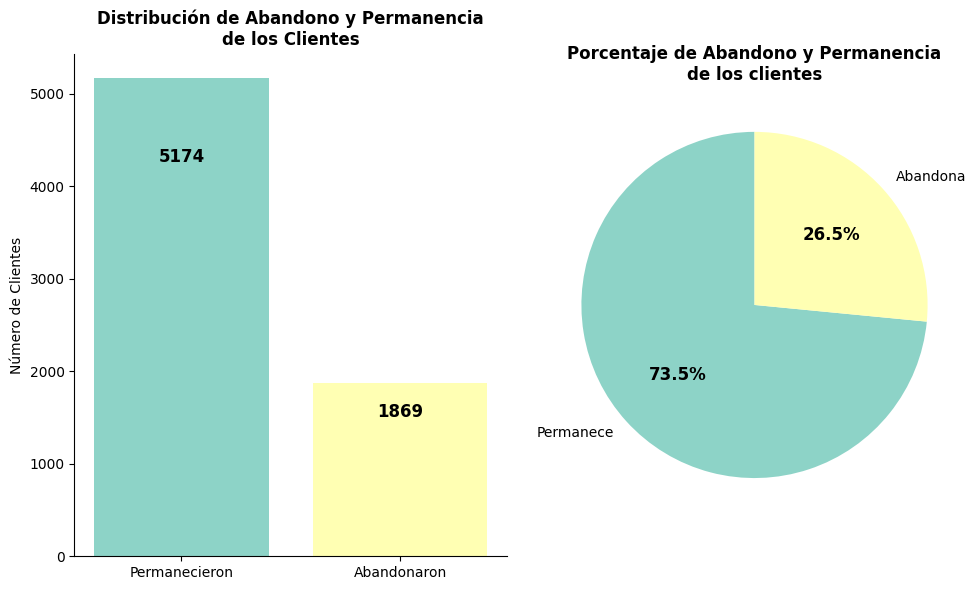

In [618]:
# Se crea los gráficos
abandono_counts = df_normalizado["abandono"].value_counts().sort_index()
abandono_props = df_normalizado["abandono"].value_counts(normalize=True).sort_index()
labels = ["Permanecieron", "Abandonaron"]
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
colors = sns.color_palette("Set3")

# Gráfico de barras
bars = axs[0].bar(
    abandono_counts.index.map({0: 'Permanecieron', 1: 'Abandonaron'}),
    abandono_counts.values,
    color=colors
)

for ax in axs.flat:
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Abandono y Permanencia\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height /1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black')

axs[0].grid(False)

#gráfico de pastel
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=abandono_counts.index.map({0: 'Permanece', 1: 'Abandona'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10})


for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porcentaje de Abandono y Permanencia\nde los clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()

## **RECUENTO DE EVASIÓN POR VARIABLES CATEGÓRICAS**

In [619]:
# Distribución de abandono por categoría
def analizar_evasion_por_categoria(df, columna):
    cruzado = pd.crosstab(df[columna], df['abandono'], normalize='index') * 100
    cruzado.columns = ['% No Abandono', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(cruzado)
    return cruzado

# Variables categóricas a analizar
categoricas = ['genero', 'tipo_contrato', 'metodo_pago', 'tipo_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = analizar_evasion_por_categoria(df_normalizado, cat)


Análisis para: genero
        % No Abandono  % Abandono
genero                           
Female      73.079128   26.920872
Male        73.839662   26.160338

Análisis para: tipo_contrato
                % No Abandono  % Abandono
tipo_contrato                            
Month-to-month      57.290323   42.709677
One year            88.730482   11.269518
Two year            97.168142    2.831858

Análisis para: metodo_pago
                           % No Abandono  % Abandono
metodo_pago                                         
Bank transfer (automatic)      83.290155   16.709845
Credit card (automatic)        84.756899   15.243101
Electronic check               54.714588   45.285412
Mailed check                   80.893300   19.106700

Análisis para: tipo_internet
               % No Abandono  % Abandono
tipo_internet                           
DSL                81.040892   18.959108
Fiber optic        58.107235   41.892765
No                 92.595020    7.404980


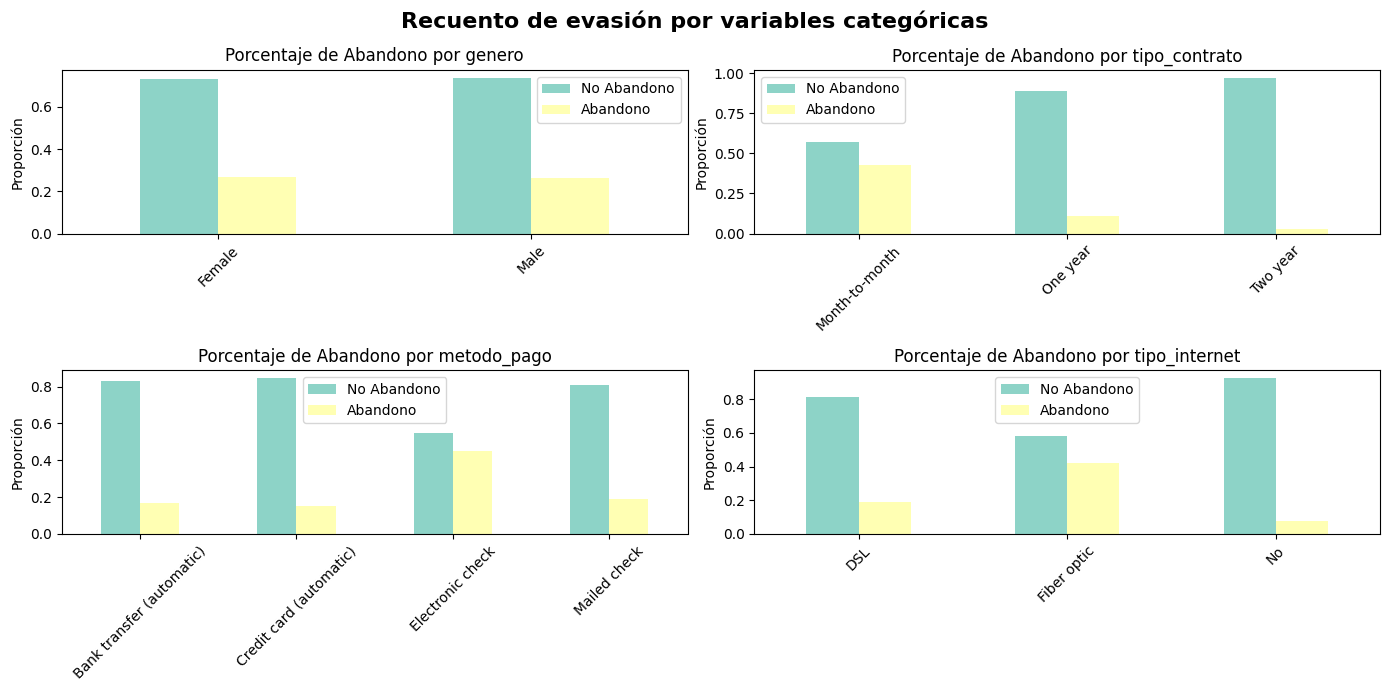

In [620]:
# 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 7))
axes = axes.flatten()
colors = sns.color_palette("Set3")

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    cruzado = pd.crosstab(df_normalizado[cat],df_normalizado['abandono'], normalize='index')
    cruzado.plot(kind='bar', ax=axes[i], color=colors)

    axes[i].set_title(f'Porcentaje de Abandono por {cat}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Proporción')
    axes[i].legend(['No Abandono', 'Abandono'])
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Recuento de evasión por variables categóricas', fontsize=16, weight='bold', ha='center')

plt.tight_layout()
plt.show()

## **CONTEO DE EVASIÓN POR VARIABLES NUMÉRICAS**

In [624]:
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias']
def analizar_evasion_numericas(df, columnas, bins=4):

    resultados = {}

    for col in columnas:
        # Crear intervalos (bins)
        df[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Tabla cruzada
        cruzado = pd.crosstab(df[f'{col}_bin'], df['abandono'], normalize='index') * 100
        cruzado.columns = ['% No Abandono', '% Abandono']

        print(f'\nAnálisis por rangos para: {col}')
        print(cruzado)

        resultados[col] = cruzado

    return resultados


resultados_numericas = analizar_evasion_numericas(df_normalizado, numericas, bins=5)


Análisis por rangos para: meses_en_empresa
                      % No Abandono  % Abandono
meses_en_empresa_bin                           
(-0.001, 6.0]             47.062795   52.937205
(6.0, 20.0]               66.571224   33.428776
(20.0, 40.0]              77.627841   22.372159
(40.0, 60.0]              84.444444   15.555556
(60.0, 72.0]              93.390192    6.609808

Análisis por rangos para: cargos_mensuales
                      % No Abandono  % Abandono
cargos_mensuales_bin                           
(18.249, 25.05]           90.845070    9.154930
(25.05, 58.83]            75.017895   24.982105
(58.83, 79.1]             70.233877   29.766123
(79.1, 94.25]             63.894812   36.105188
(94.25, 118.75]           67.187500   32.812500

Análisis por rangos para: cargos_totales
                    % No Abandono  % Abandono
cargos_totales_bin                           
(18.799, 267.07]        54.015636   45.984364
(267.07, 944.17]        71.052632   28.947368
(944.17, 2048.

In [626]:
def graficar_barras_abandono_interactivo(df, columnas, bins=10):
    datos_plot = []

    for col in columnas:
        # Crear bins para la columna numérica
        df_temp = df.copy()
        df_temp[f'{col}_bin'] = pd.qcut(df[col], q=bins, duplicates='drop')

        # Convertir bin a string para evitar error al exportar
        df_temp[f'{col}_bin'] = df_temp[f'{col}_bin'].astype(str)

        # Calcular % de abandono agrupado por bin
        resumen = df_temp.groupby(f'{col}_bin', observed=True)['abandono'].mean().reset_index()
        resumen['abandono'] = resumen['abandono'] * 100
        resumen['variable'] = col

        resumen = resumen.rename(columns={f'{col}_bin': 'rango', 'abandono': 'porcentaje_abandono'})
        datos_plot.append(resumen)

    datos_todos = pd.concat(datos_plot)

    # Gráfico interactivo de barras agrupadas
    plotly_fig = px.bar(
        datos_todos,
        x='rango',
        y='porcentaje_abandono',
        color='variable',
        barmode='group',
        title='Porcentaje de abandono según variables numéricas',
        labels={'rango': 'Rango de valor', 'porcentaje_abandono': '% de abandono', 'variable': 'Variable'}
    )

    plotly_fig.update_layout(
        width=900,
        height=500,
        xaxis_tickangle=-45,
        template='plotly_white',
        font=dict(family='Arial', size=14, color='black')
    )

    plotly_fig.show()
    return plotly_fig

# Llamar la función
numericas = ['meses_en_empresa', 'cargos_mensuales', 'cargos_totales', 'Cuentas_Diarias']
plotly_figure_for_saving = graficar_barras_abandono_interactivo(df_normalizado, numericas)


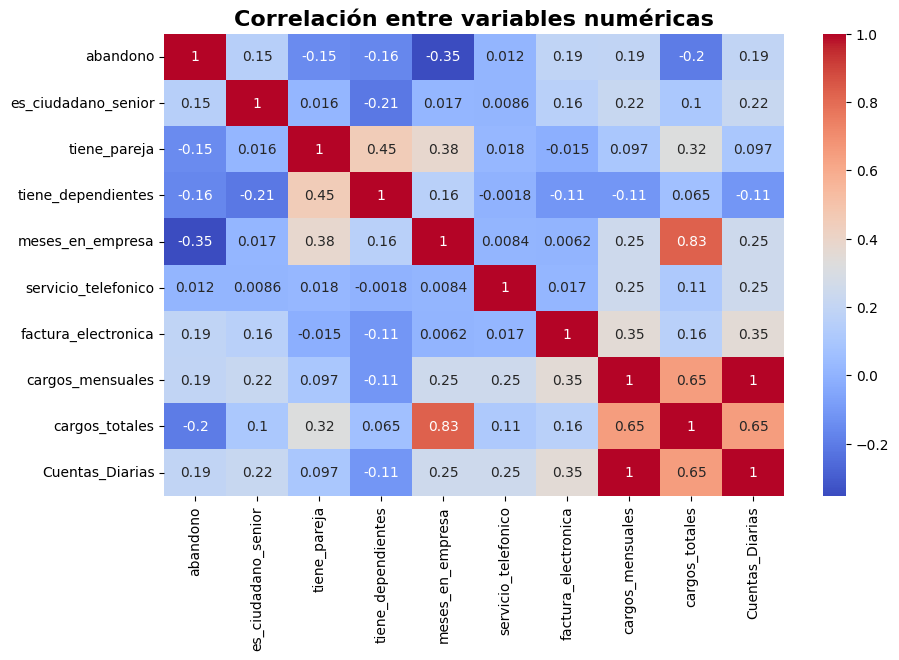

In [621]:
plt.figure(figsize=(10,6))
sns.heatmap(df_normalizado.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas", fontsize=16, weight='bold', ha='center')
plt.show()

#📄Informe final

## **Introducción**

Este análisis busca entender los factores que influyen en la decisión de los clientes de abandonar el servicio en la empresa de telecomunicaciones. La pérdida de clientes impacta directamente en la sostenibilidad y el crecimiento del negocio, ya que atraer nuevos usuarios suele ser más caro que mantener a los actuales. A través del estudio de datos históricos, el objetivo es descubrir patrones que permitan anticipar la evasión y diseñar estrategias para mejorar la retención de clientes.

## **Limpieza y Tratamiento de Datos:**

Para asegurar la calidad de la información utilizada en el análisis, se aplicaron los siguientes pasos:



*   Importación de datos obtenidos mediante la API de Telecom X en formato JSON.

*   Estandarización de los nombres de columnas, eliminando espacios para facilitar su manejo.

*   Estandarización de los nombres de columnas, eliminando espacios para facilitar su manejo.

*   Conversión de tipos de datos: se ajustaron columnas a formato numérico corrigiendo errores detectados.

*   Eliminación de valores nulos o vacíos, especialmente en variables críticas como ID_Cliente.

*   Revisión y eliminación de registros duplicados para evitar sesgos.

*   Homogeneización de variables categóricas, estandarizando categorías como Churn o Género.













## **Análisis Exploratorio de Datos:**

Obtuvimos los siguientes resultados en el análisis descriptivo:

|index|abandono|es\_ciudadano\_senior|tiene\_pareja|tiene\_dependientes|meses\_en\_empresa|servicio\_telefonico|factura\_electronica|cargos\_mensuales|cargos\_totales|Cuentas\_Diarias|
|---|---|---|---|---|---|---|---|---|---|---|
|count|7043\.0|7043\.0|7043\.0|7043\.0|7043\.0|7043\.0|7043\.0|7043\.0|7032\.0|7043\.0|
|mean|0\.2653698707936959|0\.1621468124378816|0\.4830327985233565|0\.2995882436461735|32\.37114865824223|0\.9031662643759761|0\.5922192247621753|64\.76169246059918|2283\.3004408418656|2\.1587230820199723|
|std|0\.4415613051219502|0\.3686116056100278|0\.49974751072001705|0\.4581101675100069|24\.559481023094225|0\.2957522317836505|0\.491456924049444|30\.09004709767855|2266\.771361883145|1\.0030015699226154|
|min|0\.0|0\.0|0\.0|0\.0|0\.0|0\.0|0\.0|18\.25|18\.8|0\.6083333333333333|
|25%|0\.0|0\.0|0\.0|0\.0|9\.0|1\.0|0\.0|35\.5|401\.45|1\.1833333333333333|
|50%|0\.0|0\.0|0\.0|0\.0|29\.0|1\.0|1\.0|70\.35|1397\.475|2\.3449999999999998|
|75%|1\.0|0\.0|1\.0|1\.0|55\.0|1\.0|1\.0|89\.85|3794\.7375|2\.9949999999999997|
|max|1\.0|1\.0|1\.0|1\.0|72\.0|1\.0|1\.0|118\.75|8684\.8|3\.9583333333333335|

Segun los resultados obtenidos 26.5% de los clientes cancelaron los servicios, siendo 1,869 clientes en total.

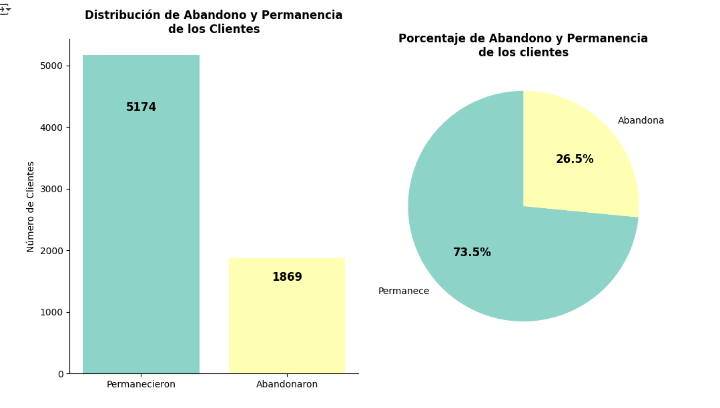

Con respecto a las variables categóricas:

*   Según el genero no existe mayor diferencia entre hombres y mujeres en abandono.
*   Por tipo de contrato se ve que abandonaron mayormente los de mes a mes que los demás tipos de contrato
*   Según el método de pago, los clientes que más abandonaron fueron los que pagan por cheque electrónico.
*   Por la categoría de tipo de internet, los que mayor abandonaron fueron los que usaban fibra óptica.



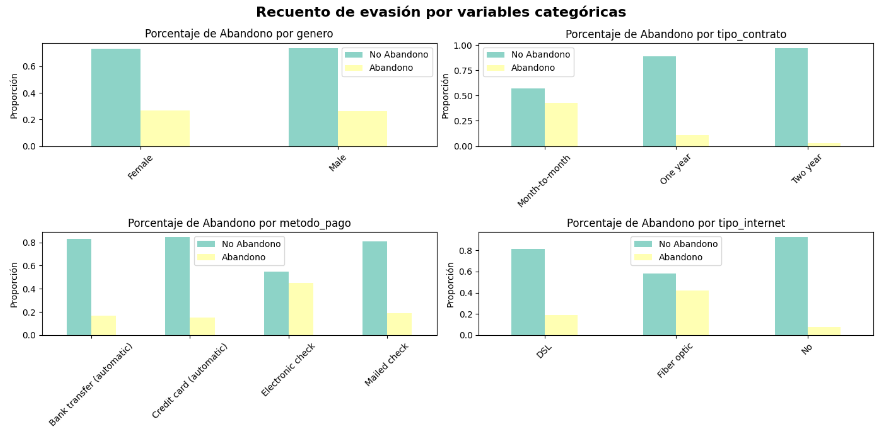

**Análisis por variables numéricas**


*   Los nuevos clientes tienden a cancelar más; los que han permanecido más tiempo son más leales.
*    Algunos clientes con alto gasto también cancelan, lo que puede indicar problemas en la percepción del valor del servicio.



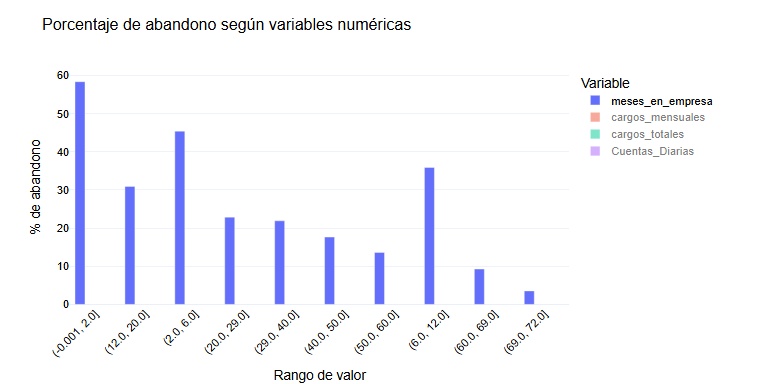

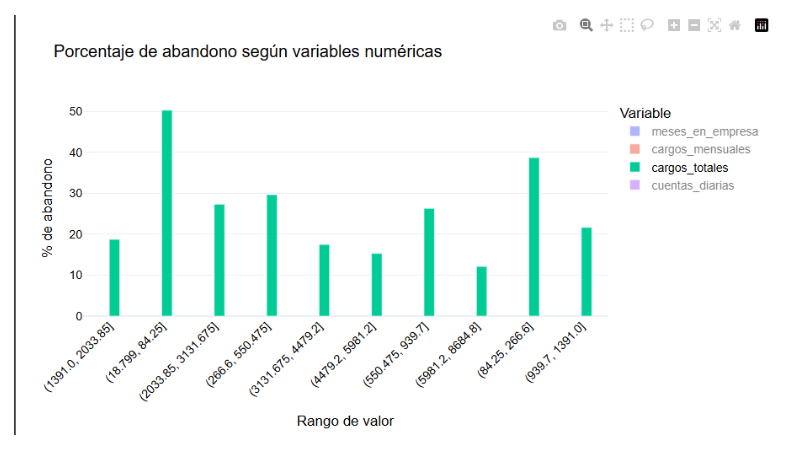

**Analisis del gráfico de correlación:**

**1. `meses_en_empresa` y `abandono`**  
- Correlación: **-0.35**  
- **Interpretación**: Los clientes con mayor antigüedad presentan menor probabilidad de abandonar. Esto sugiere que la lealtad aumenta con el tiempo y que los usuarios más nuevos son más propensos a irse.  

**2. `cargos_mensuales` y `abandono`**  
- Correlación: **0.19**  
- **Interpretación**: Existe una relación positiva, aunque moderada. Clientes con cargos mensuales más altos tienden a abandonar con mayor frecuencia, lo que puede reflejar insatisfacción con precios elevados o percepción de poco valor en el servicio.  

**3. `factura_electronica` y `abandono`**  
- Correlación: **0.19**  
- **Interpretación**: Los usuarios que usan factura electrónica muestran una ligera mayor tendencia a abandonar. Esto podría estar vinculado a que son clientes más digitalizados y con expectativas de servicio más exigentes.  

**4. `cargos_totales` y `abandono`**  
- Correlación: **-0.19**  
- **Interpretación**: A mayor gasto acumulado, menor probabilidad de evasión. Esto indica que los clientes que han invertido más en la compañía son más fieles, convirtiéndose en clientes de alto valor.  

**5. `es_ciudadano_senior` y `abandono`**  
- Correlación: **0.15**  
- **Interpretación**: Los clientes mayores tienen una leve mayor probabilidad de abandono, posiblemente debido a menor adopción tecnológica o menor uso del servicio.  


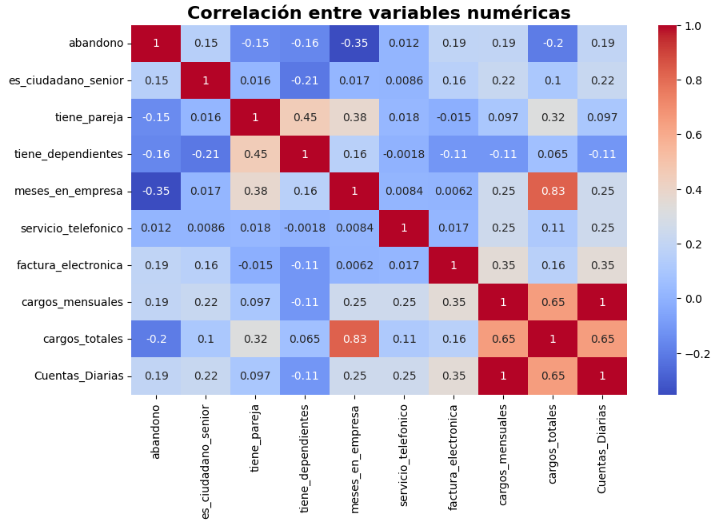

## **Conclusiones e Insights:**


1. **Tasa de abandono:**  
   - El **26.5% de los clientes** (1,869 de 7,043) cancelaron el servicio.  
   - Esto significa que casi **1 de cada 4 clientes se da de baja**, representando un desafío importante para la empresa.  

2. **Factores asociados al abandono:**  
   - **Antigüedad (`meses_en_empresa`)**: Los clientes con más tiempo en la empresa presentan menor probabilidad de abandonar.  
   - **Cargos mensuales (`cargos_mensuales`)**: Existe una relación positiva; los clientes con cargos más altos tienden a abandonar con mayor frecuencia.  
   - **Factura electrónica (`factura_electronica`)**: Los usuarios digitales muestran ligera mayor tendencia a abandonar, posiblemente por expectativas más exigentes.  
   - **Cargos totales (`cargos_totales`)**: A mayor gasto acumulado, menor probabilidad de evasión. Los clientes de mayor valor son más fieles.  
   - **Clientes seniors (`es_ciudadano_senior`)**: Tienen una leve mayor probabilidad de abandonar, posiblemente por barreras tecnológicas o menor uso.  

3. **Variables categóricas:**  
   - **Género:** No hay diferencias significativas entre hombres y mujeres.  
   - **Tipo de contrato:** Los contratos mensuales presentan mayor tasa de abandono frente a los contratos de más largo plazo.  
   - **Método de pago:** El pago con **cheque electrónico** se asocia con mayor abandono.  
   - **Tipo de internet:** Los usuarios con **fibra óptica** registran mayor tasa de abandono que los de DSL.  


## **Recomendaciones:**

1. **Fomentar contratos de mayor duración:**  
   Incentivar planes semestrales o anuales con descuentos y beneficios para reducir la fuga.  

2. **Revisar la política de precios:**  
   - Diseñar planes escalonados con diferentes niveles de servicio.  
   - Implementar programas de fidelización para clientes con cargos altos.  

3. **Mejorar la experiencia digital:**  
   - Optimizar la usabilidad de la **factura electrónica**.  
   - Ampliar los canales de soporte digital.  
   - Crear un programa de fidelización exclusivo para clientes digitales.  

4. **Atención diferenciada a clientes seniors:**  
   - Implementar soporte personalizado.  
   - Programas de capacitación tecnológica.  

5. **Migrar clientes de contratos mensuales y pagos por cheque electrónico:**  
   - Incentivar métodos de pago automáticos.  
   - Promociones atractivas para que pasen a contratos más largos.  

6. **Fortalecer el onboarding de clientes nuevos:**  
   - Beneficios exclusivos durante los primeros meses.  
   - Comunicación proactiva y programas de bienvenida.  